In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [41]:
raw_data = pd.read_csv('compas-scores-two-years.csv')

In [42]:
print('Number of records: ', raw_data.shape)
raw_data.head()

('Number of records: ', (7214, 53))


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [43]:
for i in raw_data.columns:
    print(i)

id
name
first
last
compas_screening_date
sex
dob
age
age_cat
race
juv_fel_count
decile_score
juv_misd_count
juv_other_count
priors_count
days_b_screening_arrest
c_jail_in
c_jail_out
c_case_number
c_offense_date
c_arrest_date
c_days_from_compas
c_charge_degree
c_charge_desc
is_recid
r_case_number
r_charge_degree
r_days_from_arrest
r_offense_date
r_charge_desc
r_jail_in
r_jail_out
violent_recid
is_violent_recid
vr_case_number
vr_charge_degree
vr_offense_date
vr_charge_desc
type_of_assessment
decile_score.1
score_text
screening_date
v_type_of_assessment
v_decile_score
v_score_text
v_screening_date
in_custody
out_custody
priors_count.1
start
end
event
two_year_recid


However not all of the rows are useable for the first round of analysis.

There are a number of reasons remove rows because of missing data:
* If the charge date of a defendants Compas scored crime was not within 30 days from when the person was arrested, we assume that because of data quality reasons, that we do not have the right offense.
* We coded the recidivist flag -- `is_recid` -- to be -1 if we could not find a compas case at all.
* In a similar vein, ordinary traffic offenses -- those with a `c_charge_degree` of 'O' -- will not result in Jail time are removed (only two of them).
* We filtered the underlying data from Broward county to include only those rows representing people who had either recidivated in two years, or had at least two years outside of a correctional facility.

In [45]:
df = raw_data
df = df[df.days_b_screening_arrest <= 30]
df = df[df.days_b_screening_arrest >= -30]
df = df[df.is_recid != -1]
df = df[df.c_charge_degree != "O"]
df = df[df.score_text != 'N/A']

print('Number of records: ', df.shape)


('Number of records: ', (6172, 53))


In [46]:
df.age_cat.value_counts()

25 - 45            3532
Less than 25       1347
Greater than 45    1293
dtype: int64

In [47]:
df.race.value_counts()

African-American    3175
Caucasian           2103
Hispanic             509
Other                343
Asian                 31
Native American       11
dtype: int64

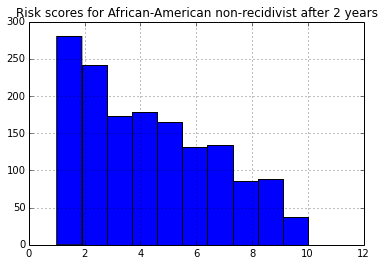

In [72]:
df[df.race == 'African-American'][df.two_year_recid == 0].decile_score.hist(bins = 10)
plt.title('Risk scores for African-American non-recidivist after 2 years')
plt.show()

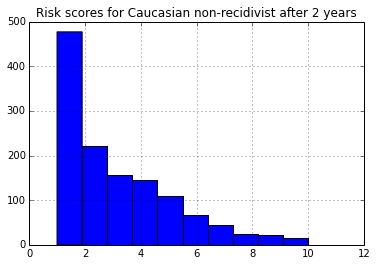

In [69]:
df[df.race == 'Caucasian'][df.two_year_recid == 0].decile_score.hist(bins = 10)
plt.title('Risk scores for Caucasian non-recidivist after 2 years')
plt.show()

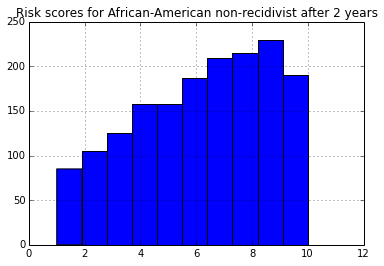

In [73]:
df[df.race == 'African-American'][df.two_year_recid == 1].decile_score.hist(bins = 10)
plt.title('Risk scores for African-American recidivist after 2 years')
plt.show()

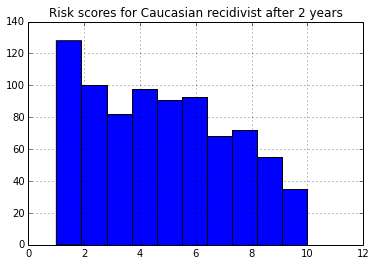

In [76]:
df[df.race == 'Caucasian'][df.two_year_recid == 1].decile_score.hist(bins = 10)
plt.title('Risk scores for Caucasian recidivist after 2 years')
plt.show()